In [ ]:
# https://www.youtube.com/watch?v=nRLI_KbvZTQ

In [1]:
import numpy as np
from scipy import stats

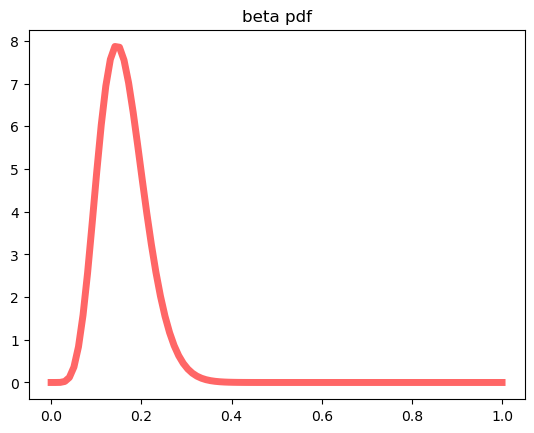

In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

a, b = 8, 42
x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6)
plt.title('beta pdf')
plt.show()


In [24]:
group_size = 1000

A_group, B_group = np.random.rand(2, group_size)

A_successes = sum(A_group < 0.15)
B_successes = sum(B_group < 0.20)

A_failures = group_size - A_successes
B_failures = group_size - B_successes

A_posterior = beta(a + A_successes, b + A_failures )
B_posterior = beta(a + B_successes, b + B_failures)

In [25]:
(np.linspace(0, 1, 100))

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

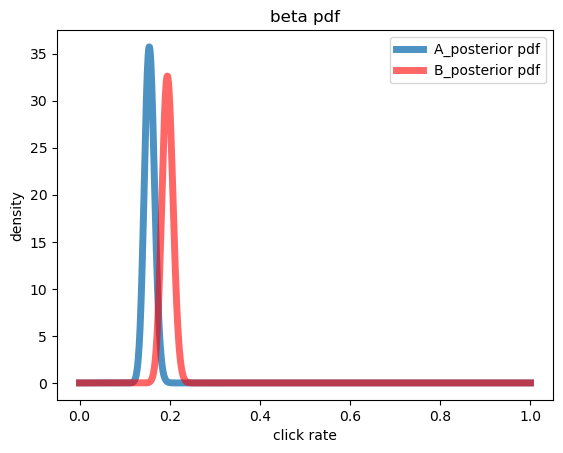

In [29]:
x = np.linspace(0, 1, 1000)
A_posterior_eval = A_posterior.pdf(x)
B_posterior_eval = B_posterior.pdf(x)
plt.plot(x, A_posterior_eval, '-', lw=5, alpha=0.8, label='A_posterior pdf')
plt.plot(x, B_posterior_eval, 'r-', lw=5, alpha=0.6, label='B_posterior pdf')
plt.title('beta pdf')
plt.legend()
plt.ylabel('density') 
plt.xlabel('click rate')
plt.show()


In [36]:
A_click_rate = x[list(A_posterior_eval).index(A_posterior_eval.max())]
B_click_rate = x[list(B_posterior_eval).index(B_posterior_eval.max())]

print(f'A_click_rate: {A_click_rate:.3f}, B_click_rate: {B_click_rate:.3f}')

A_click_rate: 0.154, B_click_rate: 0.194


In [97]:
import pandas as pd
total_tests = 100000

A_samples = pd.Series(A_posterior.rvs() for _ in range(total_tests))
B_samples = pd.Series(B_posterior.rvs() for _ in range(total_tests))

B_wins = sum(B_samples > A_samples)

print('B_wins/total_tests:',B_wins/total_tests, 'p equivalent to:', 1 - B_wins/total_tests)


B_wins/total_tests: 0.99217 p equivalent to: 0.007830000000000004


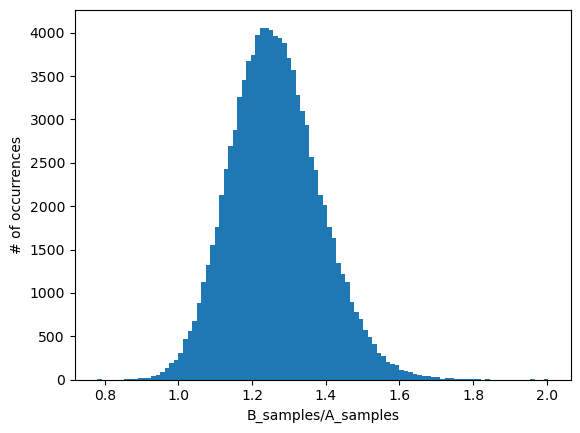

In [67]:
relative = B_samples/A_samples
nbins = 100
relative.hist(bins=nbins, grid=False)
plt.xlabel('B_samples/A_samples')
plt.ylabel('# of occurrences') 
plt.show()

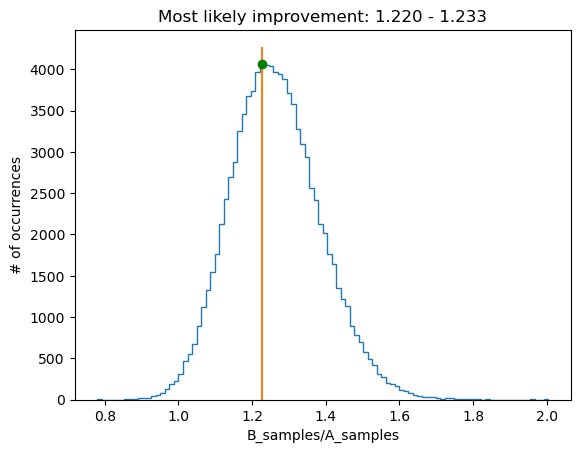

In [96]:
counts, bins = np.histogram(relative, bins=nbins)
plt.stairs(counts, bins)
improvement = (bins[list(counts).index(counts.max())], bins[list(counts).index(counts.max())+1])
plt.plot([np.mean(improvement), np.mean(improvement)], [0, counts.max()*1.05])
plt.plot(np.mean(improvement), counts.max(), marker = 'o', color='green')
plt.xlabel('B_samples/A_samples')
plt.ylabel('# of occurrences') 
plt.title(f'Most likely improvement: {improvement[0]:.3f} - {improvement[1]:.3f}')
plt.show()